In [59]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, 
                                     BatchNormalization, GlobalAveragePooling2D, Input)
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal

from tensorflow.keras.applications import ResNet50, Xception

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array




In [60]:
import os
import pandas as pd

directory = "/kaggle/input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset"
categories = ["Boot", "Sandal", "Shoe"]

filenames = []
category_labels = []

for category in categories:
    category_folder = os.path.join(directory, category)
    category_filenames = os.listdir(category_folder)
    filenames.extend([os.path.join(category, fname) for fname in category_filenames])
    category_labels.extend([category] * len(category_filenames))

df = pd.DataFrame({
    'filename': filenames,
    'category': category_labels
})

print(df.head())


               filename category
0  Boot/boot (1764).jpg     Boot
1  Boot/boot (2639).jpg     Boot
2  Boot/boot (4492).jpg     Boot
3  Boot/boot (3226).jpg     Boot
4  Boot/boot (2403).jpg     Boot


In [61]:
filenames = np.array(filenames)
labels = np.array(category_labels)
print(labels)

['Boot' 'Boot' 'Boot' ... 'Shoe' 'Shoe' 'Shoe']


In [62]:
import splitfolders
input_folder = "/kaggle/input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset"
output_folder = "/kaggle/working/output"  
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.8, 0.1, 0.1)
)


Copying files: 15000 files [00:37, 399.87 files/s] 


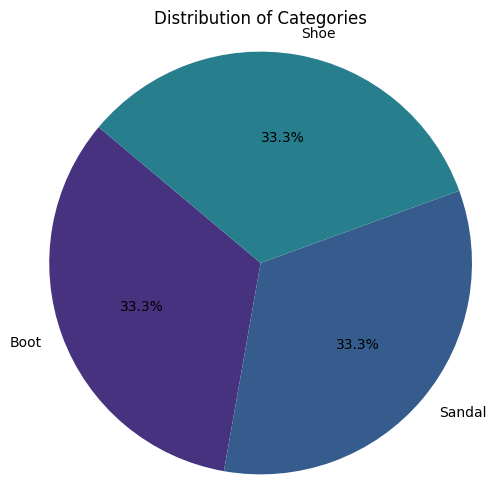

In [63]:
count = df['category'].value_counts()

plt.figure(figsize=(6, 6) , facecolor='White')
palette = sns.color_palette("viridis")
sns.set_palette(palette)
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories') 
plt.axis('equal') 

plt.show()

In [64]:
true_labels = df['category'].values
true_labels

array(['Boot', 'Boot', 'Boot', ..., 'Shoe', 'Shoe', 'Shoe'], dtype=object)

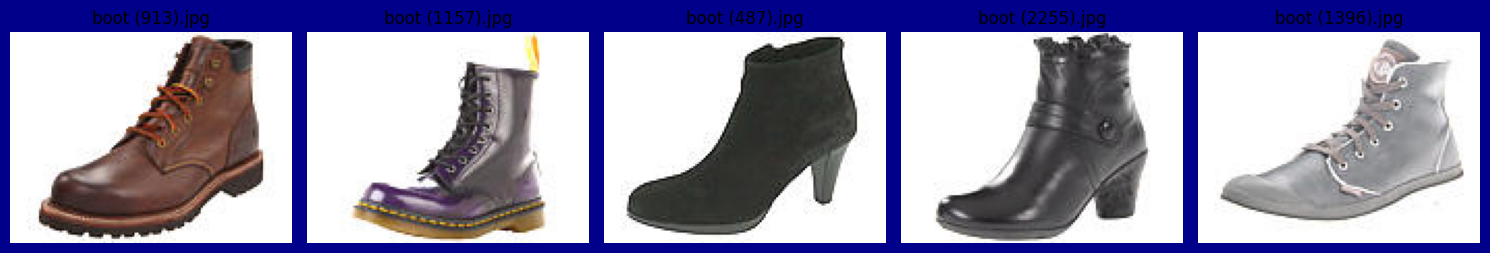

In [65]:
def visualize_images(path, num_images=5):
    image_filenames = os.listdir(path)
    
    num_images = min(num_images, len(image_filenames))
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='darkblue')
    
    for i, image_filename in enumerate(image_filenames[:num_images]):
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        axes[i].imshow(image)
        axes[i].axis('off')  
        axes[i].set_title(image_filename) 
    
    plt.tight_layout()
    plt.show()

path_to_visualize = "/kaggle/working/output/train/Boot"

visualize_images(path_to_visualize, num_images=5)

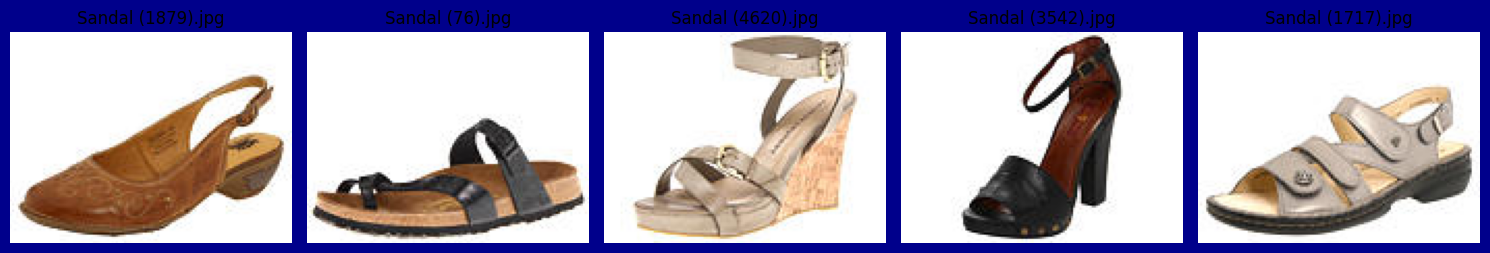

In [66]:
path_to_visualize = "/kaggle/working/output/train/Sandal"

visualize_images(path_to_visualize, num_images=5)

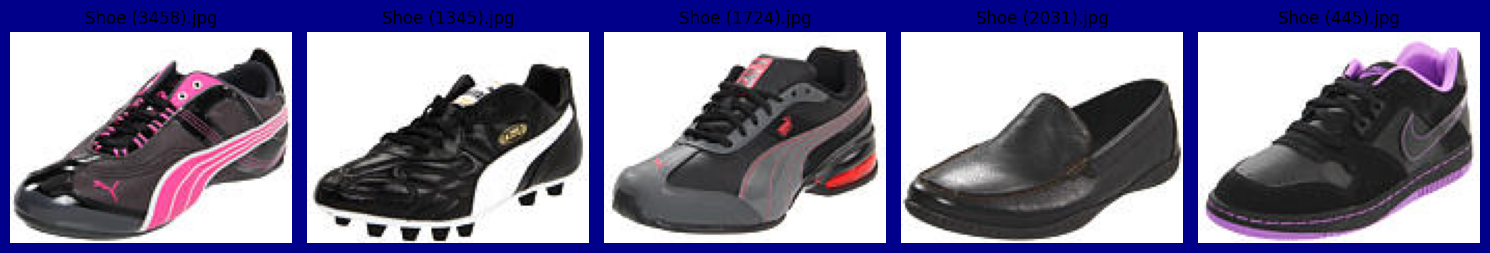

In [17]:
path_to_visualize = "/kaggle/working/output/test/Shoe"

visualize_images(path_to_visualize, num_images=5)

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/working/output/train'
val_dir = '/kaggle/working/output/val'
test_dir = '/kaggle/working/output/test'

batch_size = 32
image_size = (128, 128)
SEED = 123
# Image Generator augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,          
    width_shift_range=0.2,     
    height_shift_range=0.2,     
    shear_range=0.15,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest'        
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=SEED
)

validation_ds = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=SEED
)

test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=SEED
)


Found 12000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


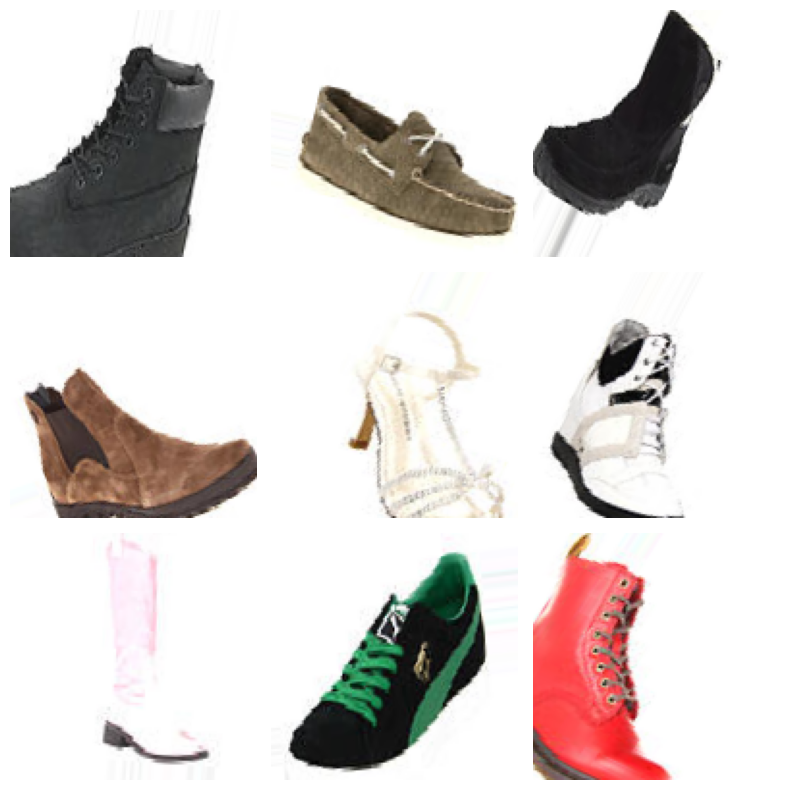

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch_images(image_generator, batch_size=9):
    images, labels = next(image_generator)

    plt.figure(figsize=(8, 8))
    for i in range(batch_size):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_batch_images(train_ds)


In [69]:


class_indices_train = train_ds.class_indices

print("Class indices", class_indices_train)



Class indices {'Boot': 0, 'Sandal': 1, 'Shoe': 2}


In [70]:

from tensorflow.keras.initializers import HeNormal
from tensorflow.keras import regularizers
model_2 = Sequential(name='Ian_G_CNN')

model_2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001), 
                 kernel_initializer=HeNormal(), input_shape=(128, 128, 3), name='CONV_Layer1'))
model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_initializer=HeNormal(), name='CONV_Layer2'))
model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.40))

model_2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_initializer=HeNormal(), name='CONV_Layer3'))
model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.40))

model_2.add(Flatten(name='Flatten'))

model_2.add(Dense(220, activation='relu', kernel_initializer=HeNormal(), name='FullyConnected1'))
model_2.add(Dense(64,activation="relu"))

model_2.add(Dense(3, activation='softmax', kernel_initializer=HeNormal(), name='OutputLayer'))

model_2.summary()



Model: "Ian_G_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CONV_Layer1 (Conv2D)            │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CONV_Layer2 (Conv2D)            │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CONV_Layer3 (Conv2D)            │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FullyConnected1 (Dense)         │ (None, 220)            │     1,802,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        14,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,815 (7.05 MB)

 Trainable params: 1,846,559 (7.04 MB)

 Non-trainable params: 256 (1.00 KB)

In [71]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)

history = model_2.fit(
    train_ds,
    epochs=5,
    steps_per_epoch=len(train_ds),
    validation_data=validation_ds,
    validation_steps=len(validation_ds),
    callbacks=[early_stopping]
)


validation_ds.reset()

y_true_all = []
y_pred_all = []

for i in range(len(validation_ds)):
    X_batch, y_batch = next(validation_ds)
    y_true = np.argmax(y_batch, axis=1)
    y_pred = np.argmax(model_2.predict(X_batch, verbose=0), axis=1)

    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)

print("Accuracy :", accuracy_score(y_true_all, y_pred_all))
print("Precision:", precision_score(y_true_all, y_pred_all, average='weighted'))
print("Recall   :", recall_score(y_true_all, y_pred_all, average='weighted'))
print("F1 Score :", f1_score(y_true_all, y_pred_all, average='weighted'))


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 348s 914ms/step - accuracy: 0.6080 - loss: 1.0522 - val_accuracy: 0.4367 - val_loss: 1.5233
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 346s 923ms/step - accuracy: 0.7411 - loss: 0.7017 - val_accuracy: 0.7013 - val_loss: 0.8512
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 349s 930ms/step - accuracy: 0.7969 - loss: 0.5936 - val_accuracy: 0.8640 - val_loss: 0.4492
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 345s 920ms/step - accuracy: 0.8329 - loss: 0.4951 - val_accuracy: 0.8087 - val_loss: 0.6076
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 337s 900ms/step - accuracy: 0.8503 - loss: 0.4516 - val_accuracy: 0.7980 - val_loss: 0.5816
Accuracy : 0.864
Precision: 0.8684115658358584
Recall   : 0.864
F1 Score : 0.8630033199143136


In [73]:
validation_loss, validation_accuracy = model_2.evaluate(validation_ds)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.8656 - loss: 0.4477
Validation Loss: 0.4491508901119232
Validation Accuracy: 0.8640000224113464


In [74]:
test_loss, test_accuracy = model_2.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.8779 - loss: 0.4186
Test Loss: 0.4330444037914276
Test Accuracy: 0.8740000128746033


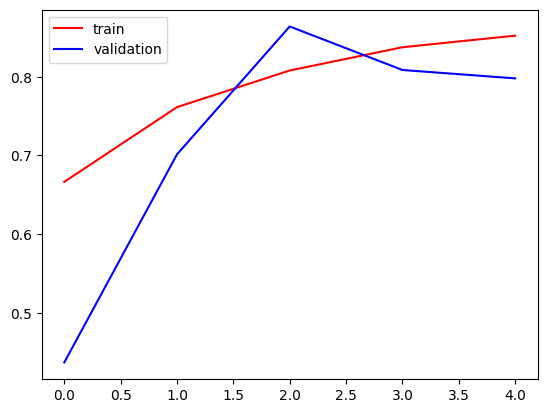

In [75]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

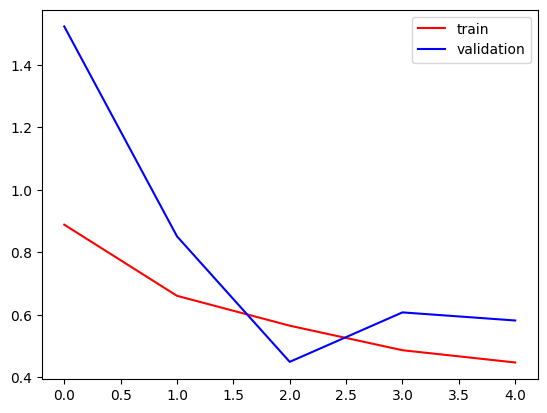

In [76]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [79]:
model_2.save('/kaggle/working/second_80_percent_model_ian_g_cnn_model.h5')


Found 1500 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


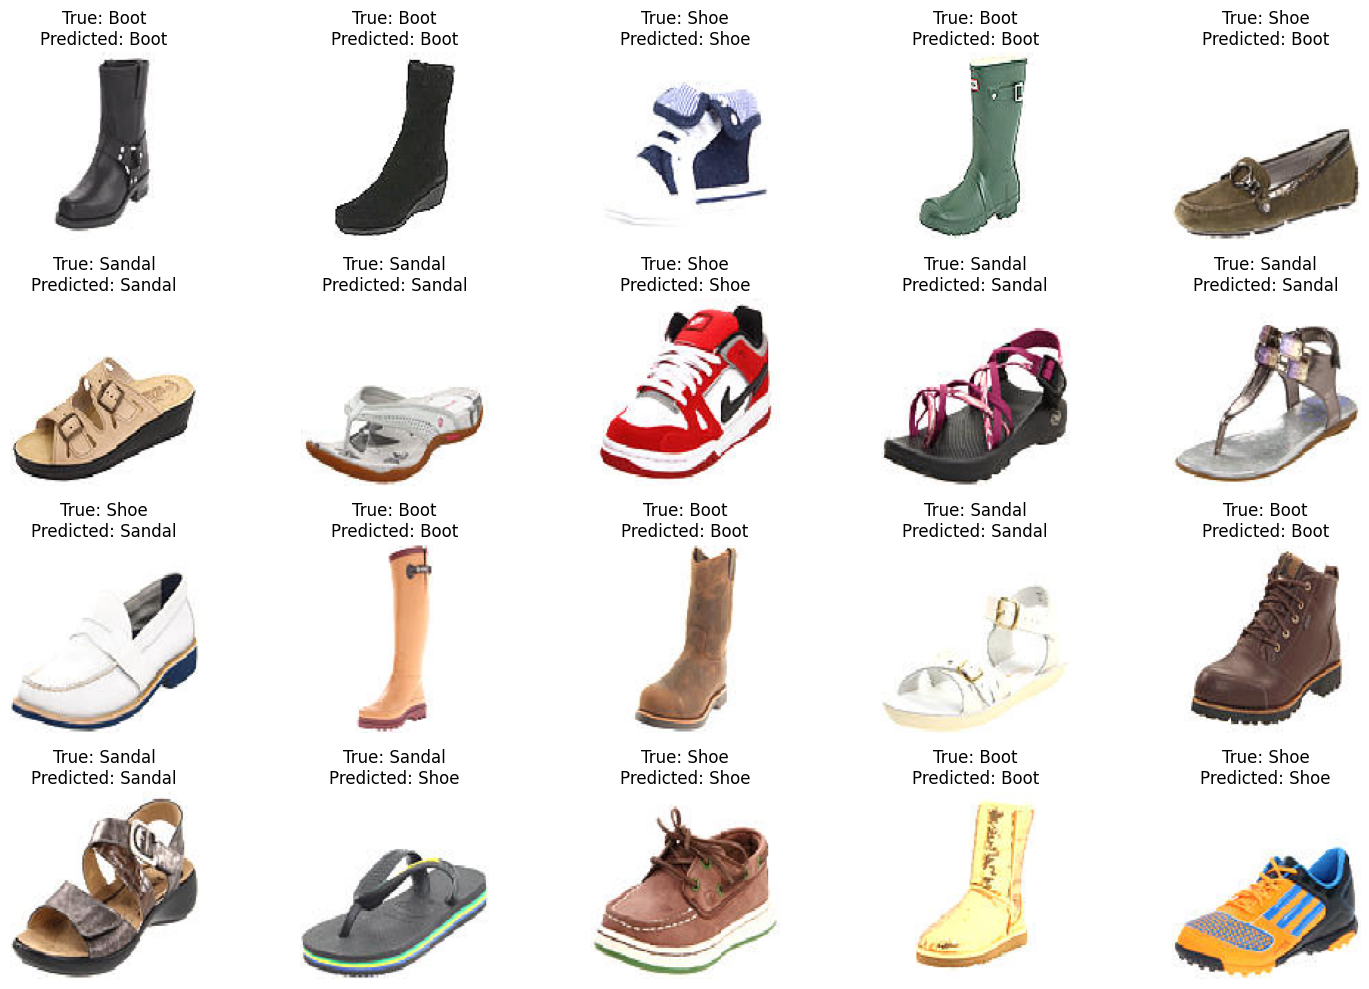

In [78]:
test_dir = "output/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128), 
    batch_size=1,
    class_mode='categorical', 
    shuffle=True
)

class_labels = list(test_generator.class_indices.keys())

num_images = 20
plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_generator)
    prediction = model_2.predict(image)
    predicted_class = class_labels[np.argmax(prediction)]
    true_class = class_labels[np.argmax(label)]
    
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[0])
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()